In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import ts_code.nsfg as nsfg
import ts_code.thinkstats2 as thinkstats2
import ts_code.thinkplot as thinkplot
import matplotlib.pyplot as plt
%matplotlib inline

## Chapter 04 - Cumulative distribution functions

Probability Mass Functions(PMF) work well is the number of values is small, but as the number of values increases, the probability of each values gets smaller (approaching zero) and the effect of random noise increases.

As this occurs we can end up with distriubtions that are difficult to interpret. It becomes hard to tell which features are meaningful and tought to even see overall patterns.

The problems can be mitigated by binning the data, dividing it into non-overlapping intervals. This is useful, but it can be tricky to get the bins correct. If they smooth out the noise, they might smooth out useful information too.

An alternative that avoid these problems is the **cumlative distribution function (CDF)**. The CDF is a fucntion that maps from a value to its percentile rank. To evalute $CDF(x)$ for a value, we compute the fraction of values in the distribution less than or equal to $x$.

In [2]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

It $x$ is less than the smallest number in our sample, it's CDF is 0, if it is greater than the largest values it's CDF is 1.

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
first = live[(live.birthord == 1) & (live.prglngth >= 27) & (live.prglngth <= 45)]
others = live[(live.birthord != 1) & (live.prglngth >= 27) & (live.prglngth <= 45)]

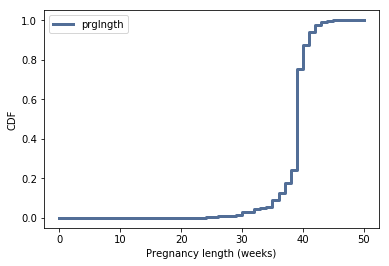

In [4]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

One way to read a CDF is to look up percentiles. For example, it looks like about 10% of pregnancies are shorter than 36 weeks, and about 90% are shorter than 41 weeks. 

The CDF also provides a visual representation of the shape of the distribution. Common values appear as steep or vertical sections of the CDF; in this example, the mode at 39 weeks is apparent.

CDFs are especially useful for comparing distributions. Once you have computed a CDF is it easy to compute percentiles, percentile ranks and other percentile-based statistics.

The 50th percentile is the value that divides the distribution in half, also known as the **median**.

Another percentile-based statistic is the **interquartile range (IQR)**, which
is a measure of the spread of a distribution. The IQR is the difference between
the 75th and 25th percentiles.

In [5]:
first_cdf = thinkstats2.Cdf(first.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

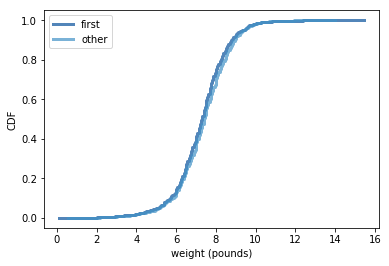

In [6]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF');

We can see that first babies are slightly lighter throughout the distribution,
with a larger discrepancy above the mean.

More generally, percentiles are often used to summarize the shape of a distribution. For example, the distribution of income is often reported in "quintiles"; that is, it is split at the 20th, 40th, 60th and 80th percentiles. 

Other distributions are divided into ten "deciles". Statistics like these that represent equally-spaced points in a CDF are called **quantiles**.

Let's choose a random sample from the live birth population and look up th epercentile rank of their bright weight, then we can compose a CDF of these ranks.

In [7]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

In [8]:
#random sample of 100 births with replacement (same value can be choose more than once)
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample] #list of percentile ranks

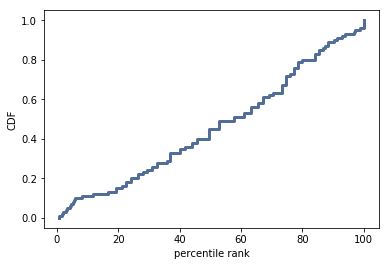

In [9]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

The CDF is approximately a straight line, which means that the distribution is uniform.

What this figure shows is that 10% of the sample is below the 10th percentile, 20% is below the 20th percentile, and so on, exactly as we should expect.

So, regardless of the shape of the CDF, the distribution of percentile ranks is uniform.

This property is useful, because it is the basis of a simple and efficient algorithm for generating random numbers with a given CDF.

Here's how:
+ Choose a percentile rank uniformly from the range 0-100.
+ Use Cdf.Percentile to find the value in the distribution that corresponds to the percentile rank you chose.

Percentile ranks are useful for comparing measurements across different groups. For example, people who compete in foot races are usually grouped by age and gender.

To compare people in different age groups, you can convert race times to percentile ranks.

In my age group, denoted M4049 for "male between 40 and 49 years of age", I came in 26th out of 256. So my percentile rank in my age group was 90%.

If I am still running in 10 years (and I hope I am), I will be in the M5059 division. Assuming that my percentile rank in my division is the same, how much slower should I expect to be?

I can answer that question by converting my percentile rank in M4049 to a position in M5059.

In [10]:
def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0 #number of people to beat
    position = field_size - beat + 1
    return position

#can also compute percentile base on the finish position
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100.0 * beat / field_size
    return percentile

### Exercises

**Exercise 4.1** How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [11]:
live_weights = live.totalwgt_lb
live_w_cdf = thinkstats2.Cdf(live_weights, label='live_totalwgt_lb')

first_weights = first.totalwgt_lb
first_w_cdf = thinkstats2.Cdf(first_weights, label='first_totalwgt_lb')

In [12]:
my_birth_weight = 7.8

live_w_cdf.PercentileRank(my_birth_weight)

65.600796636423979

In [13]:
first_w_cdf.PercentileRank(my_birth_weight)

68.122977346278319

**Exercise 4.2** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [14]:
import random

randoms = [random.random() for i in range(1001)]

In [15]:
PMF = thinkstats2.Pmf(randoms, label='randoms_PMF')
CDF = thinkstats2.Cdf(randoms, label='random_CMF')

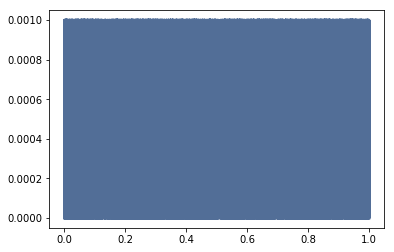

In [16]:
thinkplot.Pmf(PMF)

{'xscale': 'linear', 'yscale': 'linear'}

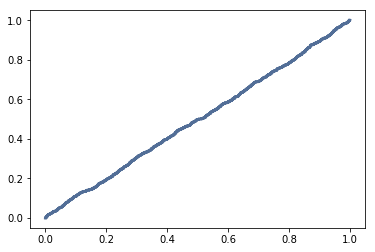

In [17]:
thinkplot.Cdf(CDF)

**Very uniform**

### Glossary

**percentile rank:** The percentage of values in a distribution that are less than or equal to a given value.

**percentile:** The value associated with a given percentile rank.

**cumulative distribution function (CDF):** A function that maps from values to their cumulative probabilities. CDF(x) is the fraction of the sample less than or equal to x.

**inverse CDF:** A function that maps from a cumulative probability, p, to the corresponding value.

**median:** The 50th percentile, often used as a measure of central tendency.

**interquartile range:** The difference between the 75th and 25th percentiles, used as a measure of spread.

**quantile:** A sequence of values that correspond to equally spaced percentile ranks; for example, the quartiles of a distribution are the 25th, 50th and 75th percentiles.

**replacement:** A property of a sampling process. "With replacement" means that the same value can be chosen more than once; "without replacement" means that once a value is chosen, it is removed from the population.